In [1]:
%matplotlib inline
%time from hikyuu import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2020-07-02 00:24:54.320 [HKU-I] - Loading market information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-02 00:24:54.325 [HKU-I] - Loading stock type information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-02 00:24:54.328 [HKU-I] - Loading stock information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-02 00:25:00.382 [HKU-I] - Loading KData... [hku::StockManager::init]
2020-07-02 00:25:00.400 [HKU-I] - Preloading all day kdata to buffer! [hku::StockManager::setKDataDriver]
2020-07-02 00:25:22.245 [HKU-I] - 21.86s Loaded Data. [hku::StockManager::init]
Wall time: 29.8 s


1 简单示例
========

查询并绘制上证指数最后100个交易日的K线数据

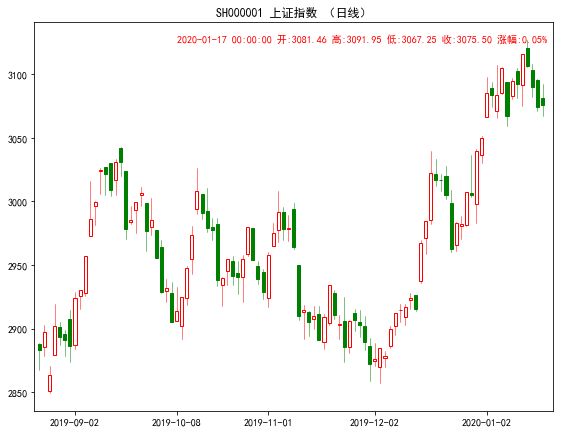

In [2]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
k.plot()

2 查看与遍历K线数据
==========

K线数据可以象list一样遍历和查看具体值

In [3]:
s = sm['sh000001']
k = s.getKData(Query(-100))  
print(k)

----------------------------------------------------------------
datetime             open     high    low    close    amo    vol
----------------------------------------------------------------
2019-08-22 00:00:00  2887.66  2888.5  2867.55  2883.44  1.69662e+07  1.49206e+06
2019-08-23 00:00:00  2885.15  2902.46  2878.74  2897.43  1.92567e+07  1.59157e+06
2019-08-26 00:00:00  2851.02  2870.49  2849.24  2863.57  1.91037e+07  1.69895e+06
2019-08-27 00:00:00  2879.52  2919.64  2879.41  2902.19  2.31e+07  2.08142e+06
2019-08-28 00:00:00  2901.63  2905.44  2887.01  2893.76  2.01805e+07  1.83098e+06
2019-08-29 00:00:00  2896  2898.6  2878.59  2890.92  1.96333e+07  1.78613e+06
2019-08-30 00:00:00  2907.38  2914.58  2874.1  2886.24  2.24751e+07  1.9396e+06
2019-09-02 00:00:00  2886.94  2928.48  2883.68  2924.11  2.26044e+07  2.02787e+06
2019-09-03 00:00:00  2925.94  2930.15  2915.2  2930.15  2.2507e+07  1.89001e+06
2019-09-04 00:00:00  2927.75  2957.41  2925.88  2957.41  2.51213e+07  2.25496e+

In [4]:
#查看最后5个交易日的K线值
k[-5:]

ValueError: Can't convert this python object to Datetime!

In [ ]:
#遍历查询最大收盘价
max_close = 0
for v in k:
    if v.closePrice > max_close:
        max_close = v.closePrice
print(max_close)

K线数据（KData）其实是有KRecord组成的数组，KRecord的属性如下：

In [ ]:
print("日期 - ", k[0].datetime)
print("开盘价 - ", k[0].openPrice)
print("最高价 - ", k[0].highPrice)
print("最低价 - ", k[0].lowPrice)
print("收盘价 - ", k[0].closePrice)
print("成交金额 - ", k[0].transAmount)
print("成交量 - ", k[0].transCount)

3 Query详解
========

获取Stock的K线数据，需要指定查询条件，可按索引和日期两种方式查询。

构建按索引方式查询条件：Query(start=0, end=None , kType=Query.DAY, recoverType=Query.NO_RECOVER)

构建按日期方式查询条件：QueryByDate(start=None, end=None, kType=Query.DAY, recoverType=Query.NO_RECOVER)

其中，索引遵循Python的惯用方式，即以0位起始，以[start, end)的方式查询，支持负数表示倒叙; 按日期查询同样遵循[start, end)惯例。

kType: 为K线数据类型（日线、分钟线、周线等）:

    - Query.DAY      日线
    - Query.WEEK     周线
    - Query.MONTH    月线
    - Query.QUARTER  季线
    - Query.HALFYEAR 半年线
    - Query.YEAR     年线
    - Query.MIN      1分钟线
    - Query.MIN5     5分钟线
    - Query.MIN15    15分钟线
    - Query.MIN30    30分钟线
    - Query.MIN60    60分钟线
    
recoverType：为复权类型（不复权、前向复权、后向复权、等比前向复权、等比后向复权），仅支持日线复权：

    - Query.NO_RECOVER     不复权
    - Query.FORWARD        前向复权
    - Query.BACKWARD       后向复权
    - Query.EQUAL_FORWARD  等比前向复权
    - Query.EQUAL_BACKWARD 等比后向复权

3.1 按索引方式查询K线数据
-------------------------

In [ ]:
#查询股票前100个交易日的K线数据
k = s.getKData(Query(0, 100))

#查询股票最后100个交易日K线数据
k = s.getKData(Query(-100))

#查询股票第199个交易日到第209个交易日的K线数据
k = s.getKData(Query(200, 210))

#查询股票倒数第100个交易日至倒数第10个交易日的K线数据
k = s.getKData(Query(-100, -10))

3.2 按日期方式查询K线数据
--------------------------

按日期查询同样遵循 [start, end) 惯例。

日期类型为Hikyuu库中定义的 Datetime，其记录的是“年月日时分”。可使用Python的datetime类型、日期字符串或数字表示法进行构建:

- Datetime(datetime.date(2017,1,1))  - 从Python的datetime构建
- Datetime('2017-1-1 9:35') - 通过日期字符串构建
- Datetime(201701010935) - 通过数字进行构建，数字格式须如“yyyymmddhhmm”（4位年份2位月份2位小时数2位分钟数）

In [ ]:
#查询2017年1月1日至今的日线数据
k = s.getKData(QueryByDate(Datetime(201701010000)))

#查询2017年1月1日至3月31日日线数据
k = s.getKData(QueryByDate(Datetime(201701010000), Datetime(201704010000)))

#查询2017年1月5日1分钟线数据
k = s.getKData(QueryByDate(Datetime(201701050000), Datetime(201701060000), kType=Query.MIN))
k.plot()

3.3 查询复权日线
----------------

In [ ]:
s = sm['sz000603']

#查询股票最后100个交易日K线数据，不复权
k = s.getKData(Query(-100))
k.plot()

In [ ]:
#查询股票最后100个交易日K线数据，后向复权
k = s.getKData(Query(-100, recoverType=Query.BACKWARD))
k.plot()